https://dev.to/azure/opencv-detect-and-blur-faces-using-haar-cascades-56d7 source


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo1(filename='photo1.jpg', filename2='photo2.jpg', filename3='photo3.jpg', filename4='photo4.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  img2 = js_to_image(data) 
  img3 = js_to_image(data)
  oriImg = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #oriImg= cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
#canny edge detection
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
      img = cv2.GaussianBlur(img,(3, 3), 3)
      #canny
      face = img[y:y+h, x:x+w]
      face = cv2.Canny(face,10,40)
      # merge this canny rectangle to our final image
      img[y:y+face.shape[0], x:x+face.shape[1]] = face #canny 
#sobel edge detection
  for (x,y,w,h) in faces:
      img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(255,0,0),2)
      img2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
      img2 = cv2.GaussianBlur(img2,(3, 3), 5)
      face2 = img2[y:y+h, x:x+w]
      sobelx = cv2.Sobel(face2, cv2.CV_64F,1,0,ksize=3)
      sobely = cv2.Sobel(face2, cv2.CV_64F,0,1,ksize=3)
      face2 = sobelx + sobely
      # merge this sobel rectangle to our final image
      img2[y:y+face2.shape[0], x:x+face2.shape[1]] = face2 #sobel
#blur
  for (x,y,w,h) in faces:
      img3 = cv2.rectangle(img3,(x,y),(x+w,y+h),(255,0,0),2)
      face = img3[y:y+h, x:x+w]
      face = cv2.GaussianBlur(face,(23, 23), 30)
      # merge this blurry rectangle to our final image
      img3[y:y+face.shape[0], x:x+face.shape[1]] = face   
         
  # save image
  cv2.imwrite(filename, img)
  cv2.imwrite(filename2, img2)
  cv2.imwrite(filename3, img3)
  cv2.imwrite(filename4, oriImg)

  return filename, filename2, filename3, filename4

In [ ]:
try:
  filename = take_photo1('photo1.jpg','photo2.jpg','photo3.jpg','photo4.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image('photo1.jpg'))
  display(Image('photo2.jpg'))
  display(Image('photo3.jpg'))
  display(Image('photo4.jpg'))

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

C) Calculating the number of coins in an image using contours

In [ ]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/KPT Workshop Assignment/Week 1/"

Coins in the image:  52


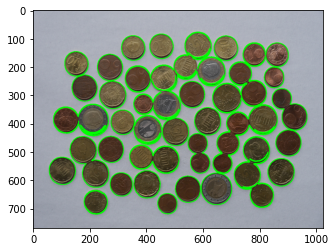

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(path+'coins.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

blur = cv2.GaussianBlur(gray, (11,11), 0)
plt.imshow(blur, cmap='gray')

canny = cv2.Canny(blur, 40, 150, 3)
plt.imshow(canny, cmap='gray')

dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated, cmap='gray')

(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)

plt.imshow(rgb)


print('Coins in the image: ', len(cnt))
plt.show()